In [1]:
!conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y

Solving environment: done

# All requested packages already installed.



In [2]:
#pip install pandas-profiling

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('churn_data.csv')

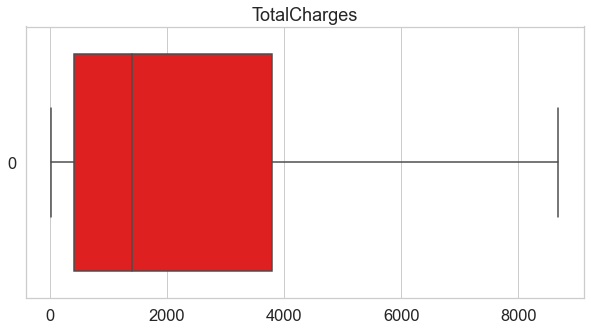

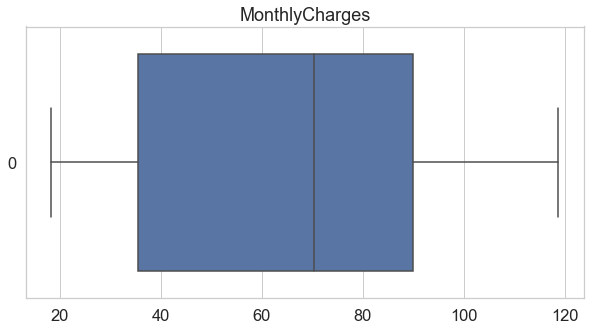

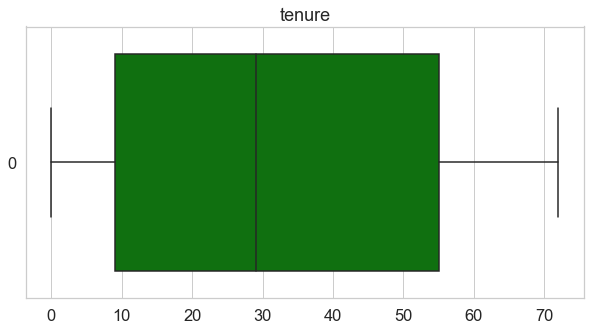

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5, style='whitegrid')
sns.boxplot(data=df['TotalCharges'], orient='h', color='Red').set(title='TotalCharges')
plt.show()
sns.boxplot(data=df['MonthlyCharges'], orient='h').set(title='MonthlyCharges')
plt.show()
sns.boxplot(data=df['tenure'], orient='h',  color='Green').set(title='tenure')
plt.show()

In [7]:
df.isna().sum()

customerID         0
tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

customerID        0
tenure            0
PhoneService      0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [9]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   int64  
 3   Contract        7043 non-null   int64  
 4   PaymentMethod   7043 non-null   int64  
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7043 non-null   float64
 7   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 440.3+ KB


,skew,kurtosis
tenure,0.239540,-1.387372
PhoneService,-2.727153,5.438908
Contract,0.630959,-1.272210
PaymentMethod,0.218405,-1.395076
MonthlyCharges,-0.220524,-1.257260
TotalCharges,0.963789,-0.226400
Churn,1.063031,-0.870211


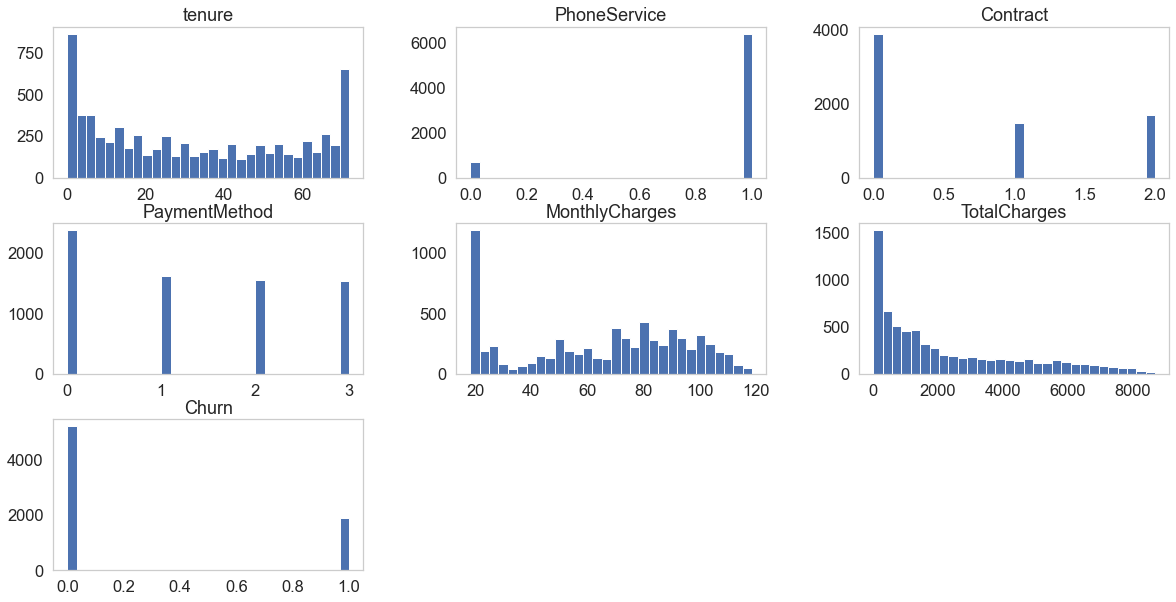

In [10]:
df.hist(grid=False,
       figsize=(20, 10),
       bins=30)
df.agg(['skew', 'kurtosis']).transpose()

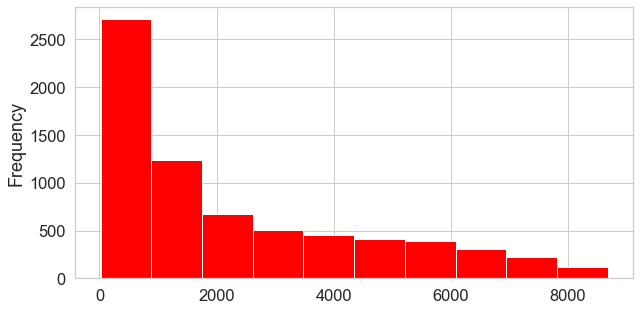

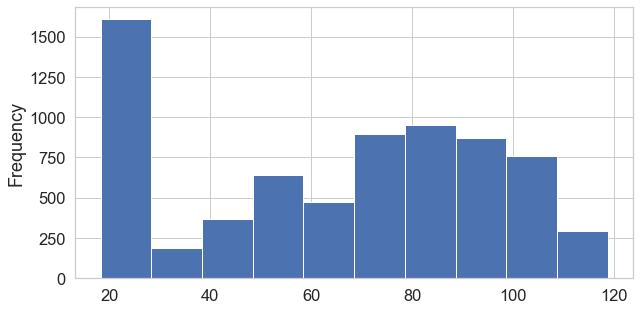

In [11]:
df['TotalCharges'].plot.hist(color='red')
plt.show()

df['MonthlyCharges'].plot.hist()
plt.show()

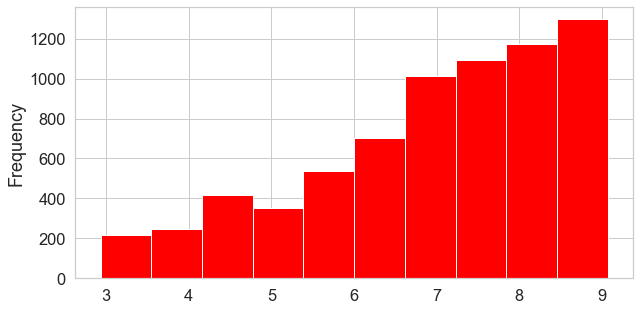

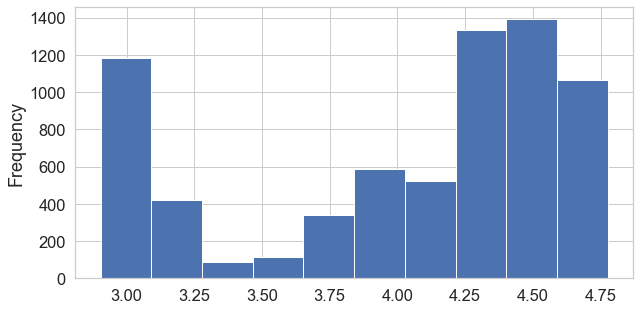

In [12]:
import numpy as np
df_log = df.copy()
df_log['tenure'] = np.log1p(df_log['tenure'])
df_log['TotalCharges'] = np.log(df_log['TotalCharges'])
df_log['MonthlyCharges'] = np.log(df_log['MonthlyCharges'])

df_log['TotalCharges'].plot.hist(color='red')
plt.show()
df_log['MonthlyCharges'].plot.hist()
plt.show()

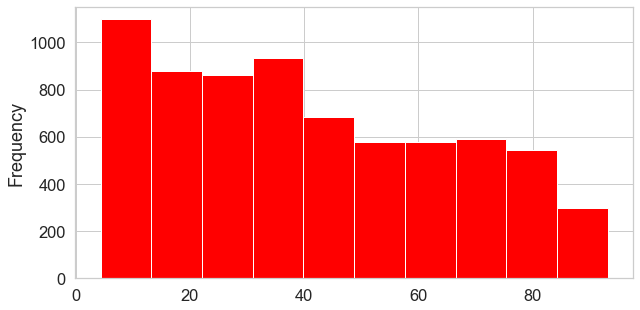

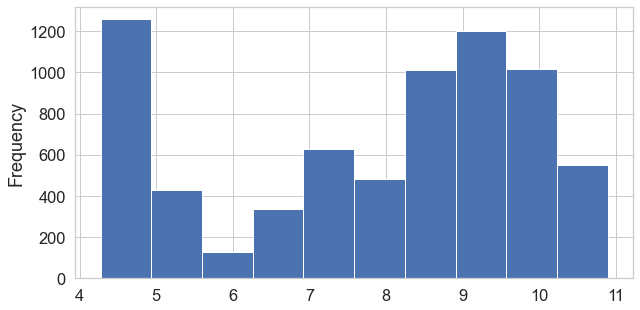

In [13]:
import pandas as pd
import numpy as np

df_sqrt = df.copy()
df_sqrt['tenure'] = np.sqrt(df_sqrt['tenure'])
df_sqrt['TotalCharges'] = np.sqrt(df_sqrt['TotalCharges'])
df_sqrt['TotalCharges'].plot.hist(color='red')
plt.show()
df_sqrt['MonthlyCharges'] = np.sqrt(df_sqrt['MonthlyCharges'])
df_sqrt['MonthlyCharges'].plot.hist()
plt.show()

In [14]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
df['Box_Cox']= boxcox(df['TotalCharges'])[0]
df['TotalCharges_Transform'] = PowerTransformer('box-cox').fit_transform(df[['TotalCharges']])
df[['TotalCharges_Transform', 'TotalCharges', 'Box_Cox']].plot.density(subplots=True, sharex=False)


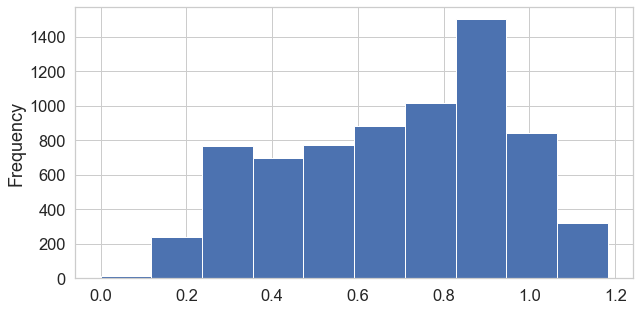

-0.2684422287472045

In [15]:
df['Tenuresqrt/TotalCharges_Ratio'] = df_sqrt['tenure'] / df_log['TotalCharges']
df['Tenuresqrt/TotalCharges_Ratio'].plot.hist()
plt.show()
df['Tenuresqrt/TotalCharges_Ratio'].skew()

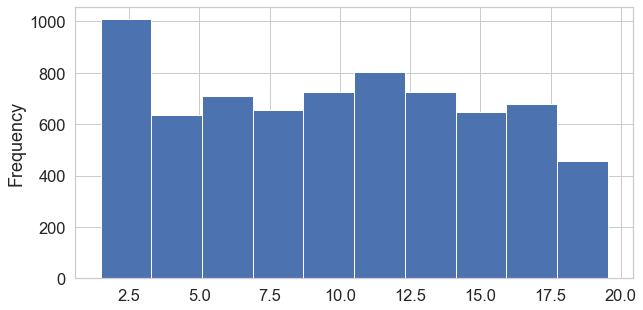

0.014648177952546687

In [16]:
df['TotalChargeslog/MonthlyCharges_Ratio'] = df_sqrt['TotalCharges'] / df_log['MonthlyCharges']
df['TotalChargeslog/MonthlyCharges_Ratio'].plot.hist()
plt.show()
df['TotalChargeslog/MonthlyCharges_Ratio'].skew()

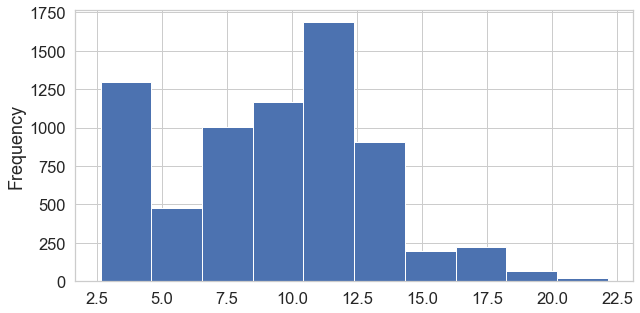

0.01966134097435715

In [17]:
df['MonthlyCharges/TotalCharges_Ratio'] = df['MonthlyCharges'] / df_log['TotalCharges']
df['MonthlyCharges/TotalCharges_Ratio'].plot.hist()
plt.show()
df['MonthlyCharges/TotalCharges_Ratio'].skew()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   tenure                                7043 non-null   int64  
 2   PhoneService                          7043 non-null   int64  
 3   Contract                              7043 non-null   int64  
 4   PaymentMethod                         7043 non-null   int64  
 5   MonthlyCharges                        7043 non-null   float64
 6   TotalCharges                          7043 non-null   float64
 7   Churn                                 7043 non-null   int64  
 8   Tenuresqrt/TotalCharges_Ratio         7043 non-null   float64
 9   TotalChargeslog/MonthlyCharges_Ratio  7043 non-null   float64
 10  MonthlyCharges/TotalCharges_Ratio     7043 non-null   float64
dtypes: float64(5), in

In [ ]:
df.to_csv("clean_churn_data.csv")
#to export the cleaned file. Important to add inplace=True to keep the changes

To start off I created a boxplot to see if there were any outliers in the numerical data. There were no outliers, in TotalCharges, MonthlyCharges or tenure. Since I didn't have to deal with any outliers I went on to see if there were any missing values. There were 11 missing values in the TotalCharges category. The data looked to be slightly skewed so I decided to replace those 11 values with the median of TotalCharges. Next I converted the categorical columns to numerical values. This allowed me to calculate ratios between the variables in my data.
I used a couple different methods to normalize my data. I used log and square root to normalize my data. I did attempt to use PowerTransformer and Box-cox, but I couldn't get it to work. Square rooting the data seemed to lower the value of the skew more than the log method for TotalCharges. I calculated the ratio of tenure to TotalCharges. There was a pretty good correlation between the two. I also calculated the ratio for TotalCharges to MonthlyCharges and vice versa. I played around with the normalized data I was inputting to try and get the lowest skew I could get. Overall using the sqrt of TotalCharges and dividing it by the log of MonthlyCharges gave me the lowest skew value at 0.014648177952546687. 


